In [ ]:
from tqdm import tqdm
import cv2
import numpy as np
from scipy.ndimage import binary_dilation

In [33]:
# 加载数据和mask
data=np.load("/home/vrlab/Projects/print_ngp_lyf/💾HDDSnake/🐶MASK/duck-best_dscale10/volume/ngp_84/array/allData-maskView1.npy")
mask = np.load("/home/vrlab/Projects/print_ngp_lyf/💾HDDSnake/🐶MASK/duck-best_dscale10/volume/ngp_84/array/mask-view3.npy")
mask.shape #(2142, 2403)
# 使用双线性插值进行重采样,确保不会缩小volumeBeyondTheGlass[:,i,:,:]
new_width = int(np.ceil(volumeBeyondTheGlass[:,i,:,:].shape[1]/3))  # 向上取整确保不会小于目标大小
volumeBeyondTheGlass[:,i,:,:] = cv2.resize(volumeBeyondTheGlass[:,i,:,:].astype(np.float32), (new_width, volumeBeyondTheGlass[:,i,:,:].shape[0]), 
                 interpolation=cv2.INTER_LINEAR)
volumeBeyondTheGlass[:,i,:,:] = volumeBeyondTheGlass[:,i,:,:] > 0.5  # 二值化回布尔值


# 先转置数据
transposed_data = np.transpose(data, (1, 0, 2, 3))

# 遍历每个切片并应用volumeBeyondTheGlass[:,i,:,:]
for i in tqdm(range(transposed_data.shape[0])):
    # 获取当前切片
    # 将不在volumeBeyondTheGlass[:,i,:,:]内的点设为0
    transposed_data[i][~volumeBeyondTheGlass[:,i,:,:]] = 0

# 将数据转置回原来的形状
data = np.transpose(transposed_data, (1, 0, 2, 3))

# 保存处理后的数据
np.save("/home/vrlab/Projects/print_ngp_lyf/💾HDDSnake/🐶volumeBeyondTheGlass[:,i,:,:]/duck-best_dscale10/volume/ngp_84/array/allData.npy", data)

100%|██████████| 483/483 [00:11<00:00, 42.77it/s]


鸭子

In [8]:
data=np.load("/home/vrlab/Projects/print_ngp_lyf/💾HDDSnake/🐶MASK/duck-best_dscale10/volume/ngp_84/array/allData.npy")
mask=np.load("/home/vrlab/Projects/print_ngp_lyf/💾HDDSnake/🐶MASK/duck-best_dscale10/volume/ngp_84/array/mask-view1.npy")


# 遍历每个切片并应用mask
for i in tqdm(range(data.shape[0])):
    # 获取当前切片
    slice = data[i]
    # 将不在mask内的点设为0
    data[i][~mask] = 0
transposed_data = np.transpose(data, (1, 0, 2, 3))

transposed_data[:, :(2142-1939), :, :]=0
transposed_data[:, 2053:, :, :]=0
data = np.transpose(transposed_data, (1, 0, 2, 3))

np.save("/home/vrlab/Projects/print_ngp_lyf/💾HDDSnake/🐶MASK/duck-best_dscale10/volume/ngp_84/array/allData.npy", data)


100%|██████████| 2142/2142 [00:13<00:00, 161.96it/s]


熊猫

In [138]:
data=np.load("💾HDDSnake/🐶MASK/new_panda_d-1/volume/ngp_63/array/allData-mask1.npy")
mask=np.load("💾HDDSnake/🐶MASK/new_panda_d-1/volume/ngp_63/array/mask-view1.npy")
# 使用双线性插值进行重采样,确保不会缩小mask
new_width = int(np.ceil(mask.shape[0]/2))  # 向上取整确保不会小于目标大小
mask = cv2.resize(mask.astype(np.float32), (mask.shape[1], new_width, ), 
                 interpolation=cv2.INTER_LINEAR)
mask = mask > 0.5  # 二值化回布尔值
# 遍历每个切片并应用mask
for i in tqdm(range(data.shape[0])):
    # 将不在mask内的点设为0
    data[i][~mask] = 0
    
np.save("💾HDDSnake/🐶MASK/new_panda_d-1/volume/ngp_63/array/allData.npy", data)


100%|██████████| 2142/2142 [00:04<00:00, 450.64it/s]


In [132]:
data.shape

(2142, 409, 608, 4)

In [135]:
mask.shape

(608, 409)

In [139]:
data=np.load("💾HDDSnake/🐶MASK/new_panda_d-1/volume/ngp_63/array/allData-mask1.npy")

mask=np.load("💾HDDSnake/🐶MASK/new_panda_d-1/volume/ngp_63/array/mask-view3.npy")
# 使用双线性插值进行重采样,确保不会缩小mask
new_width = int(np.ceil(mask.shape[1]/3))  # 向上取整确保不会小于目标大小
mask = cv2.resize(mask.astype(np.float32), (new_width, mask.shape[0]), 
                 interpolation=cv2.INTER_LINEAR)
mask = mask > 0.5  # 二值化回布尔值
mask=np.flip(mask, axis=0)

transposed_data = np.transpose(data, (1, 0, 2, 3))
for i in tqdm(range(transposed_data.shape[0])):
    # 将不在mask内的点设为0
    transposed_data[i][~mask] = 0


# transposed_data[:, :(2142-1939), :, :]=0
# transposed_data[:, 2053:, :, :]=0
data = np.transpose(transposed_data, (1, 0, 2, 3))

np.save("💾HDDSnake/🐶MASK/new_panda_d-1/volume/ngp_63/array/allData.npy", data)
    

100%|██████████| 409/409 [00:04<00:00, 83.28it/s]


In [35]:
expanded_mask = np.repeat(~mask[..., np.newaxis], 4, axis=-1)

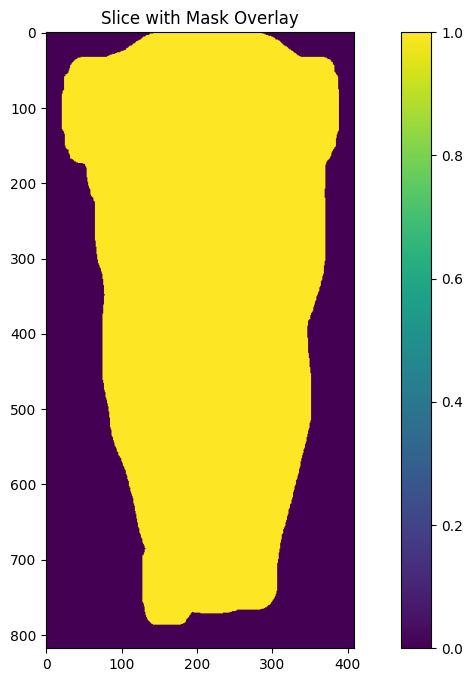

In [124]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(mask)
plt.title("Slice with Mask Overlay")
plt.colorbar()
plt.show()

In [20]:
# from PIL import Image
# import numpy as np
# import os

# # 定义图片目录
# image_dir = "/home/vrlab/Projects/print_ngp_lyf/💾HDDSnake/🐶MASK/new_panda_d-1/volume/ngp_63/print/"

# # 遍历目录中的所有图片文件
# for filename in os.listdir(image_dir):
#     if filename.endswith(".png"):
#         image_path = os.path.join(image_dir, filename)
        
#         # 读取图片
#         image = Image.open(image_path)
        
#         # 将图片转换为numpy数组
#         image_array = np.array(image)
        
#         # 获取原始图片的宽度和高度
#         original_height, original_width, channels = image_array.shape
        
#         # 创建一个新的数组，扩展100像素的高度
#         new_height = original_height + 50
#         expanded_image_array = np.zeros((new_height, original_width, channels), dtype=image_array.dtype)
        
#         # 将原始图片数据复制到新的数组中
#         expanded_image_array[:original_height, :, :] = image_array
        
#         # 将扩展部分填充为黑色（或其他颜色）
#         expanded_image_array[original_height:, :, :] = 0  # 黑色
        
#         # 将扩展后的数组转换回图片
#         expanded_image = Image.fromarray(expanded_image_array)
        
#         # 覆盖保存扩展后的图片
#         expanded_image.save(image_path)


In [38]:
printFolder="💾HDDSnake/🏆FINAL/lego_diffuse_d-1/volume30/volume/ngp_21/print"
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

# 获取目录下的所有文件名，并按字母顺序排序
image_files = sorted(os.listdir(printFolder))

# 初始化一个空的numpy数组用于叠加图片
combined_image = None


for file_name in image_files:
    if file_name.endswith('.png'):  # 只读取RGBA的PNG图片
        image_path = os.path.join(printFolder, file_name)
        image = Image.open(image_path).convert("RGBA")
        image_array = np.array(image)
        
        
        
        if combined_image is None:
            combined_image = np.zeros_like(image_array, dtype=np.float32)
            thresh_img=np.zeros_like(image_array[...,3], dtype=np.float32)
        
        thresh_img += image_array[...,3]
        # 仅在combined_image中为0的地方叠加image_array的值
        mask = (combined_image[...,3] == 0)
        combined_image[mask] = image_array[mask].astype(np.float32)

# 将叠加后的图片数组转换回Image对象
combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)
final_image = Image.fromarray(combined_image, "RGBA")


In [49]:
thresh_mask = thresh_img > 255*10
thresh_mask = np.repeat(thresh_mask[..., np.newaxis], 4, axis=-1)
final_image_mask = thresh_mask * combined_image
# final_image_mask =   combined_image[thresh_mask]
    

In [53]:
final_image_mask.shape

(521, 695, 4)

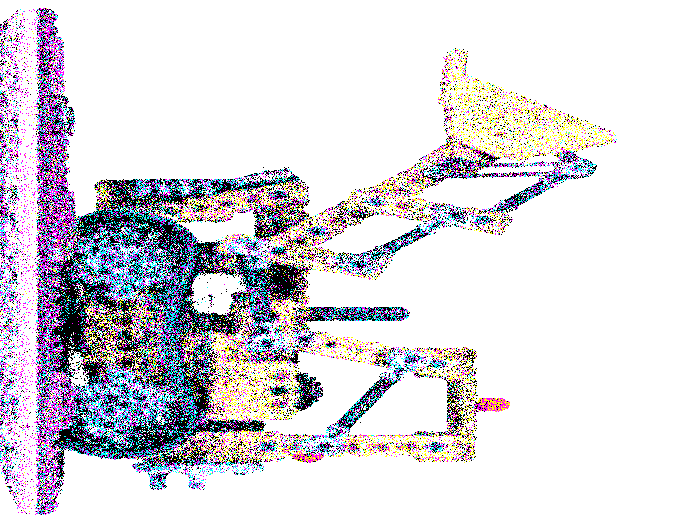

In [51]:
Image.fromarray(np.array(Image.fromarray(final_image_mask, "RGBA").resize((final_image_mask.shape[1] // 4, final_image_mask.shape[0] // 4), Image.BILINEAR)), "RGBA")

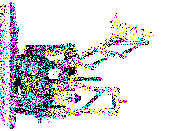

In [56]:
smallfig = Image.fromarray(final_image_mask[::4, ::4], "RGBA")
smallfig.save("final_image_small.png")
smallfig

In [52]:
Image.fromarray(final_image_mask, "RGBA").save("final_image.png")